### EXP1- Language RMAPS seeds

#### *Preprocessing:*
- Niak preprocessed LANGUAGE task (new scrub method)

#### *Connectome r-Maps:*

```
   opt_csv.labels_x = { 'BROCA_L' , 'PSTG_L' , 'MTG_L','ANTERIOR_POLE_L' }; % network labels 
   opt_csv.labels_y = { 'index' };
   tab = [2;30;38;34];
```

In [1]:
from nilearn import plotting
import os
import numpy as np
import nibabel as nib
import scipy.io as sio

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline

In [3]:
# Set path
path_root = "/media/yassinebha/database27/Drive/HCP/"
path_rmaps = os.path.join(path_root,"subtypes_scores/26-10-2016/connectome_LANGUAGE_15-Dec-2016/rmap_seeds_nii/")
rmaps_file_pattern = "average_rmap_{}.nii.gz"

In [4]:
# get networks names
net_names = [f[13:-7] for f in os.listdir(path_rmaps)]
net_names

['ANTERIOR_POLE_L', 'PSTG_L', 'BROCA_L', 'MTG_L']

seed-based correlation shape: (53, 64, 52)
seed-based correlation: min = -0.200; max = 0.593
seed-based correlation Fisher-z transformed: min = -0.203; max = 0.683
Rmaps for seed in the ANTERIOR_POLE_L
seed-based correlation shape: (53, 64, 52)
seed-based correlation: min = -0.152; max = 0.673
seed-based correlation Fisher-z transformed: min = -0.153; max = 0.816
Rmaps for seed in the PSTG_L
seed-based correlation shape: (53, 64, 52)
seed-based correlation: min = -0.168; max = 0.655
seed-based correlation Fisher-z transformed: min = -0.170; max = 0.784
Rmaps for seed in the BROCA_L
seed-based correlation shape: (53, 64, 52)
seed-based correlation: min = -0.171; max = 0.656
seed-based correlation Fisher-z transformed: min = -0.172; max = 0.786
Rmaps for seed in the MTG_L


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


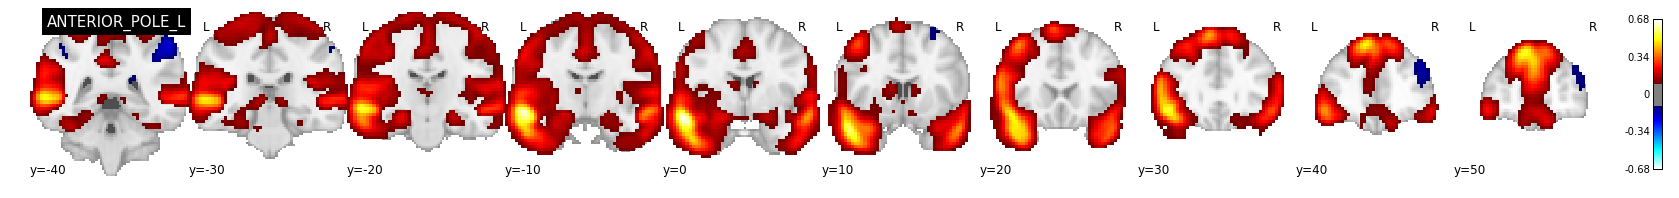

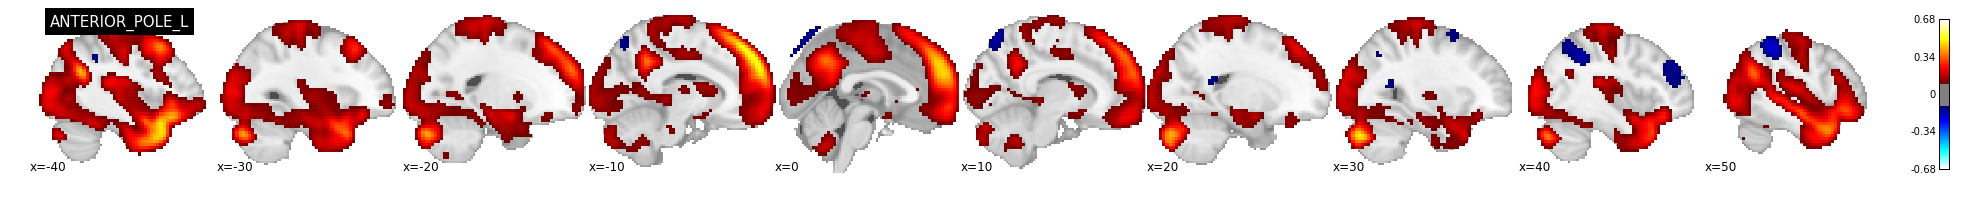

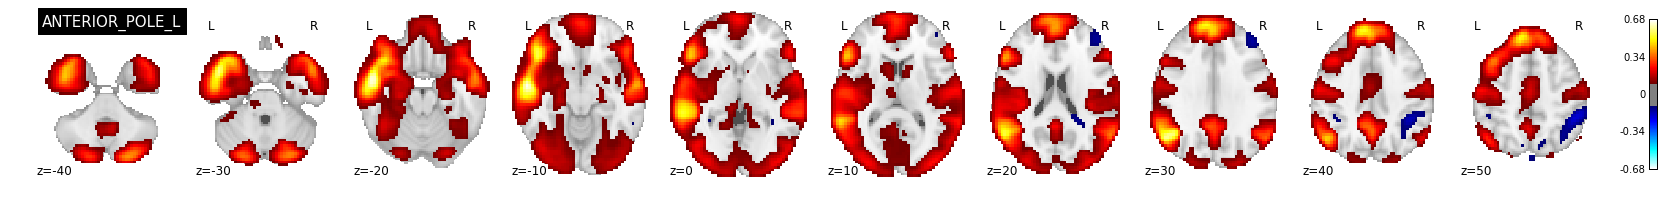

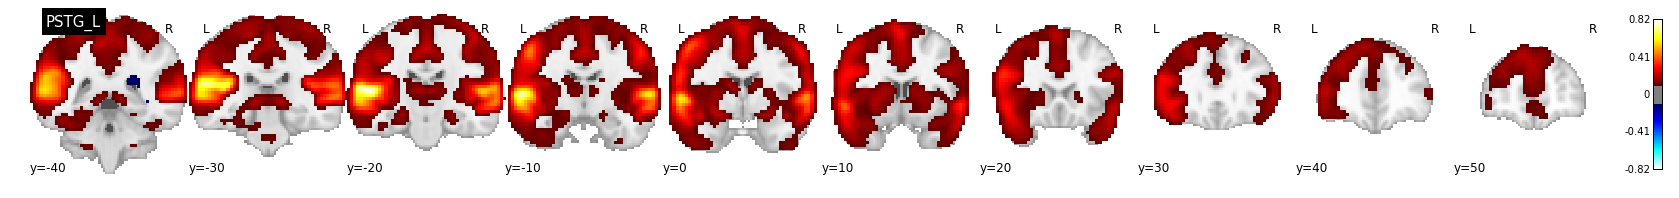

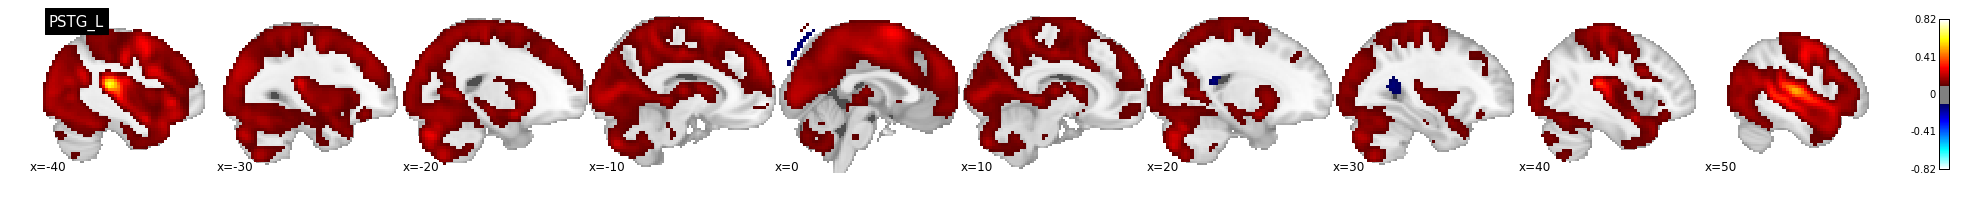

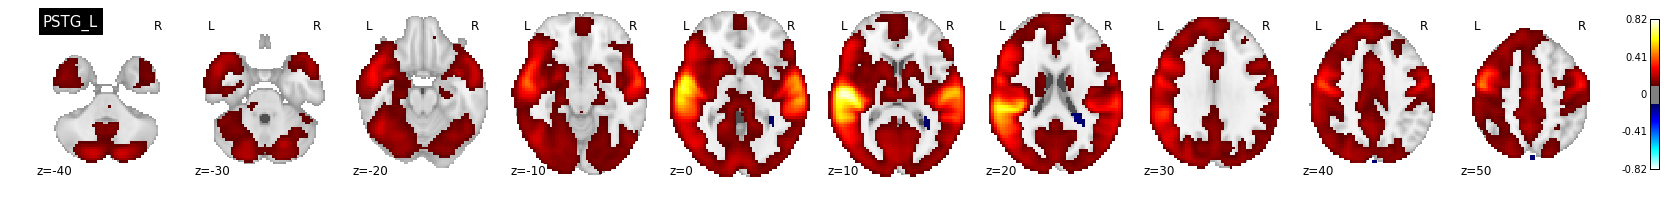

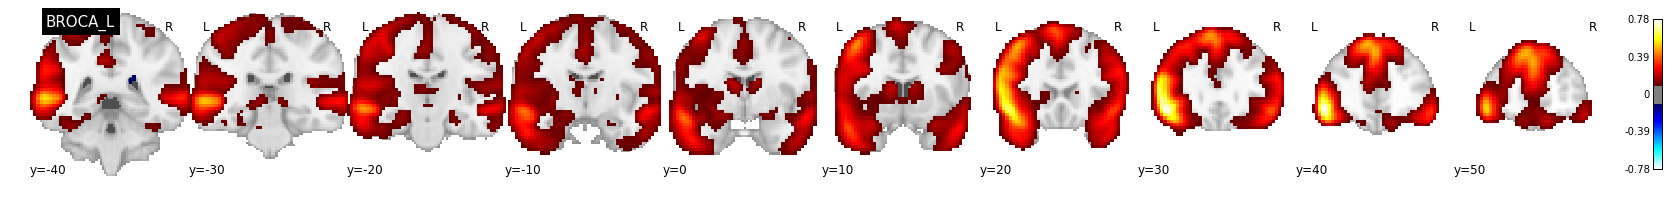

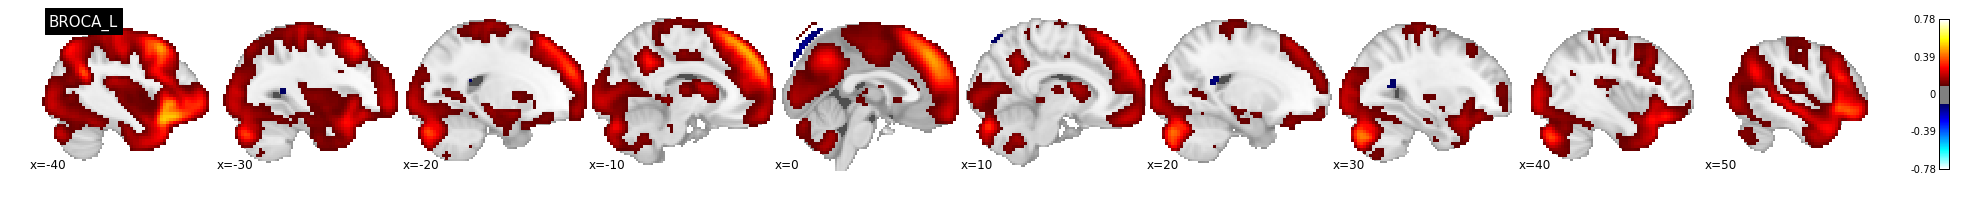

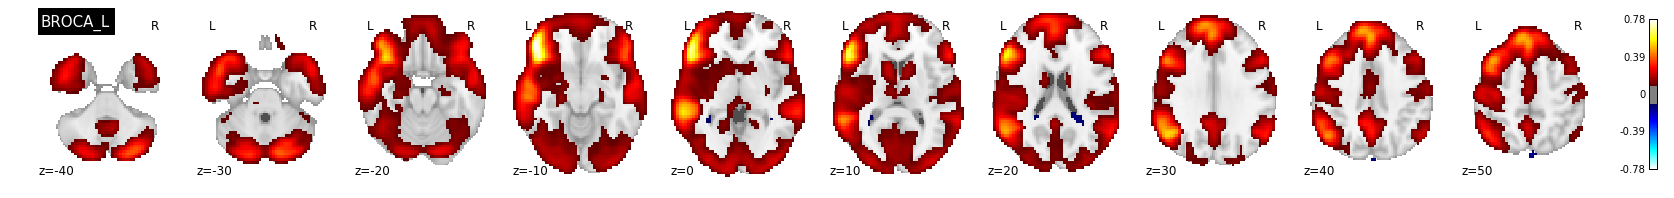

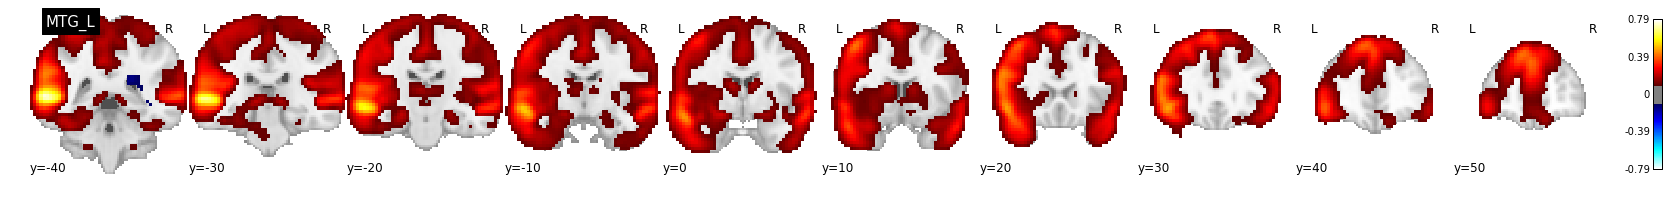

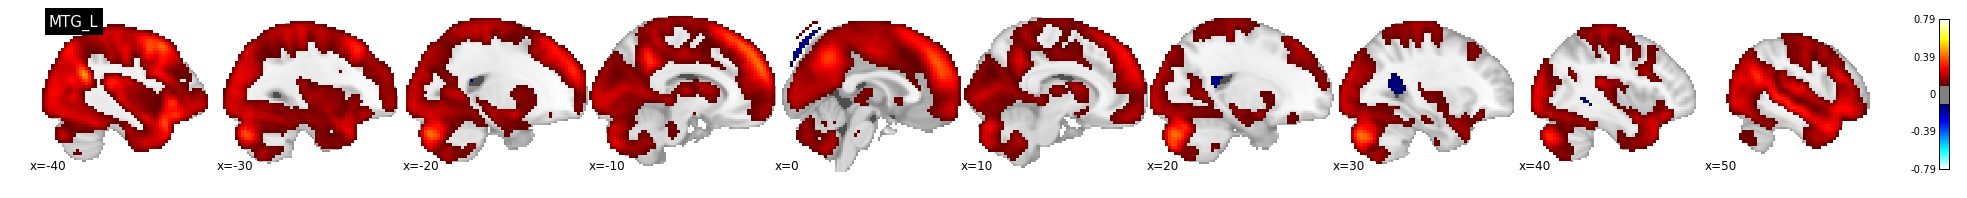

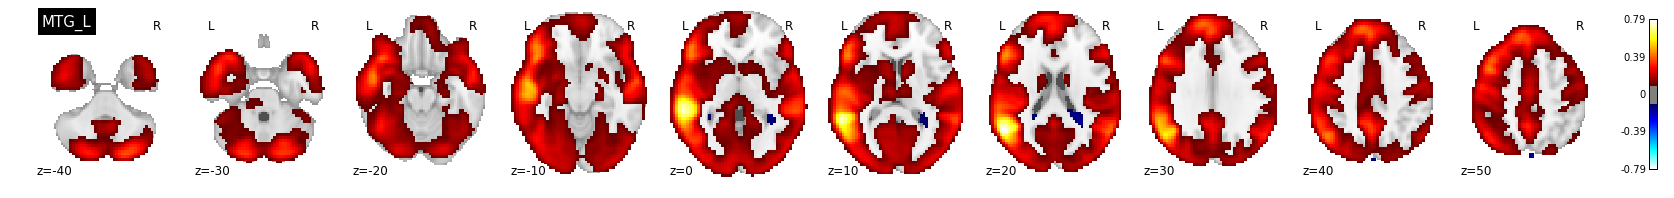

In [17]:
for index, net in enumerate(net_names):
    net_file = os.path.join(path_rmaps, rmaps_file_pattern.format(net))
    in_vol=nib.load(net_file)
    
    print("seed-based correlation shape: (%s, %s, %s)" % in_vol.shape)
    print("seed-based correlation: min = %.3f; max = %.3f" % (in_vol.get_data().min(), in_vol.get_data().max()))
    
    seed_based_correlations_fisher_z = np.arctanh(in_vol.get_data())
    print("seed-based correlation Fisher-z transformed: min = %.3f; max = %.3f" % (
    seed_based_correlations_fisher_z.min(),
    seed_based_correlations_fisher_z.max()))
    
    # Turn fisher transform data into volume
    in_vol_fisher = nib.Nifti1Image(seed_based_correlations_fisher_z, affine=in_vol.affine, header=in_vol.header)
    
    print ("Rmaps for seed in the {}".format(net))
    display = plotting.plot_stat_map(in_vol_fisher, threshold= .1,
                                     display_mode='y',
                                     cut_coords= range(-40, 60, 10),
                                     title= net
                                    )
    display = plotting.plot_stat_map(in_vol_fisher, threshold=.1,
                                     display_mode='x',
                                     cut_coords= range(-40, 60, 10),
                                     title= net
                                    )
    display = plotting.plot_stat_map(in_vol_fisher, threshold=.1,
                                     display_mode='z',
                                     cut_coords= range(-40, 60, 10),
                                     title= net
                                    )